In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

In [53]:
SAVE_FIGURES = False
xlabel = 'Log($g_{pmog}$) [$ms^{-2}$]'
FILTER = 'Quality simulation'

In [54]:
raw = Result(load_sparc(namespace='pmog/201_21'))

In [55]:
raw.dataframe['Sgbar'] *= 0.6

# Raw untuned results

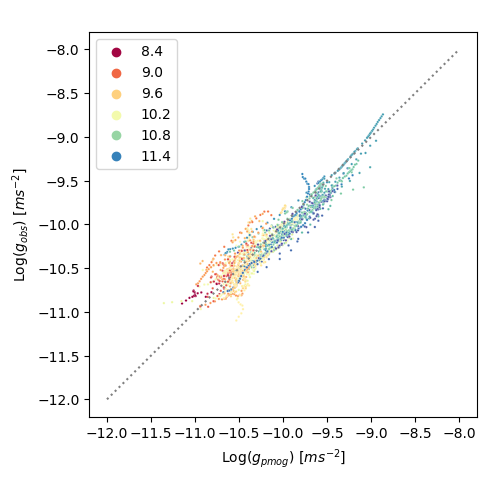

In [56]:
g = raw.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_rar.eps')

# Tuning within reasonable bounds

In [57]:
analysis = Tune(mcmc(raw.datasets()[FILTER], train_g=True, tight={'Inc': 1.2, 'D': 5, 'Ymass': 5}))

In [58]:
tuned = analysis.Result(fast=True, simulations=raw.simulations)

In [59]:
# adjust dataset for gamma train
tuned.dataframe['Sgbar'] *= analysis.uni['gamma']
analysis.uni

{'gamma': array(0.6385355)}

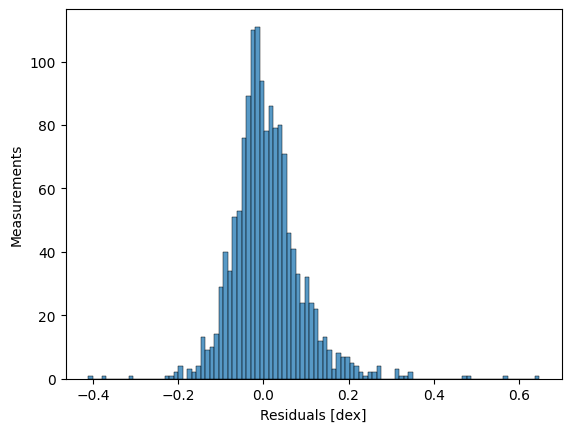

In [61]:
g, data = tuned.residual_hist(query_key=FILTER)
if SAVE_FIGURES: g.get_figure().savefig('../figures/pmog_hist.eps')

Everything 0.010700467131992715 0.13449002442724103 2059
Quality data 0.010700467131992715 0.13449002442724103 2059
Quality simulation 0.007944946202158897 0.08259069151846828 1459
Quality simulation 2 0.008650278383106481 0.07628475665520609 1303


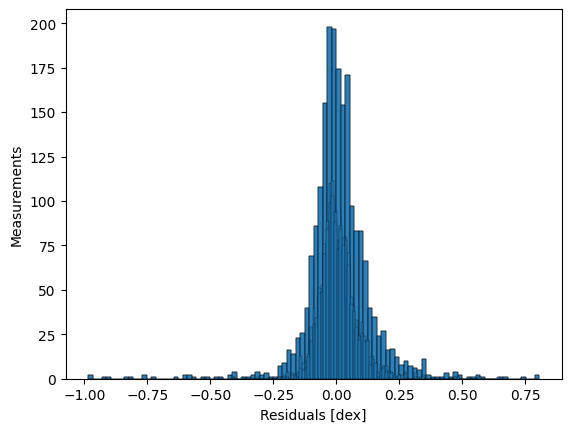

In [62]:
for k in tuned.queries_strs.keys():
    g, data = tuned.residual_hist(query_key=k)
    print(k, data.mean(), data.std(), data.count())

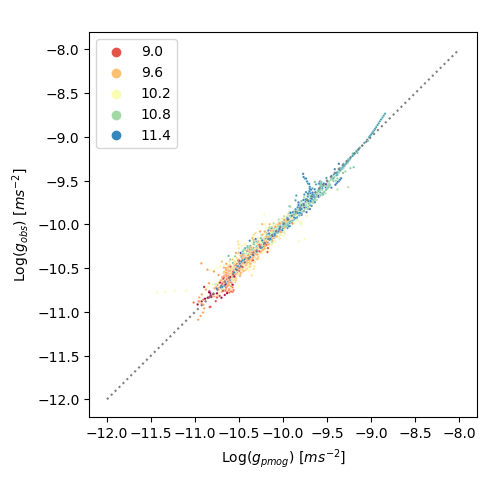

In [63]:
g = tuned.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_tuned.eps')

/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


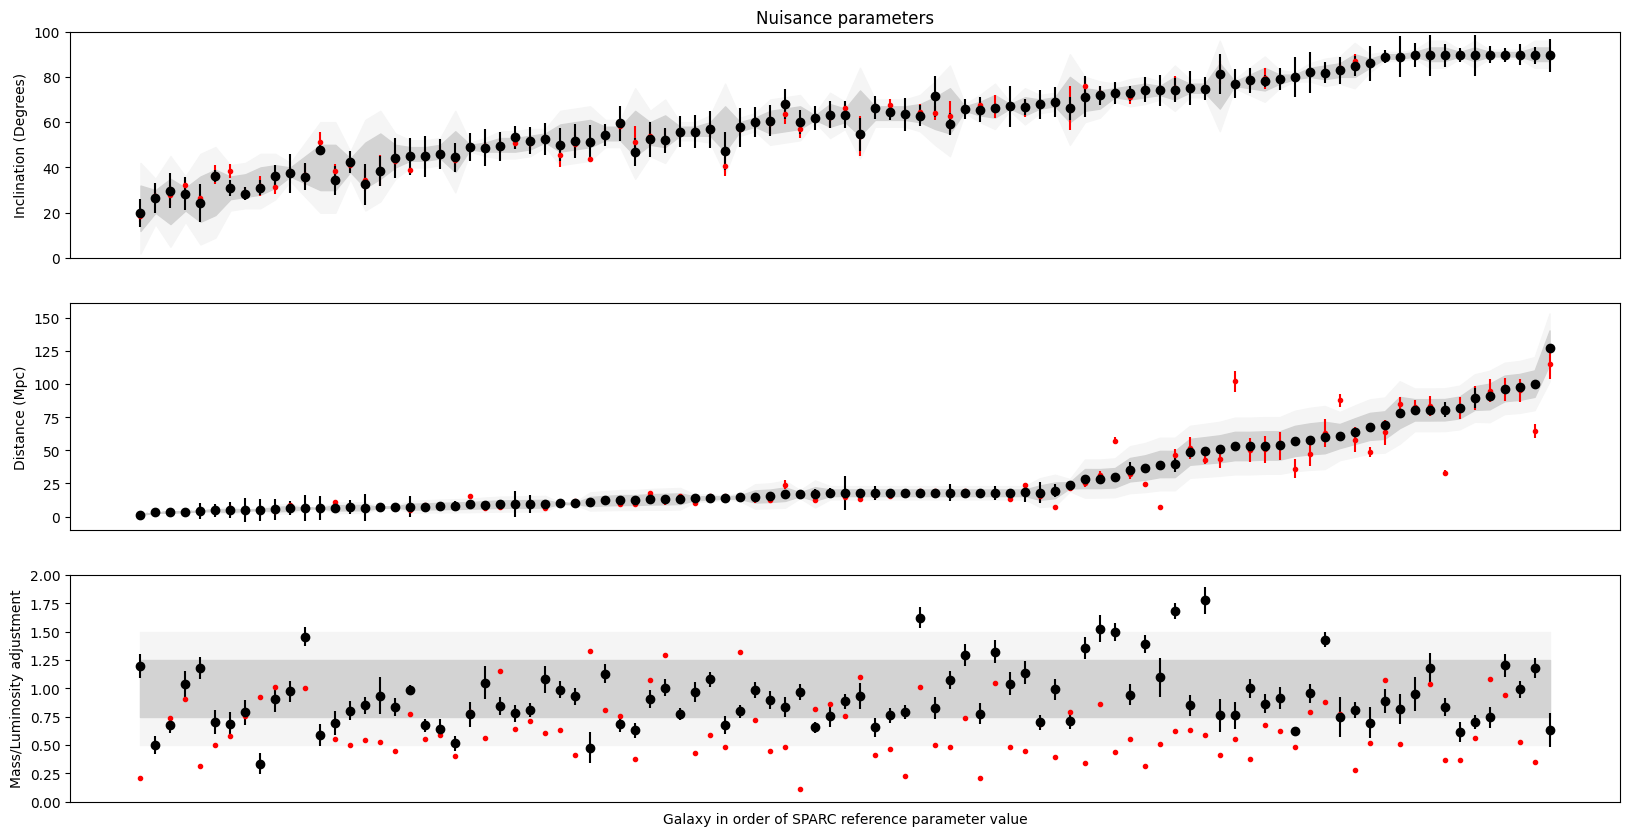

In [51]:
g = analysis.plot_nuissance()
if SAVE_FIGURES: g.get_figure().savefig('../figures/pmog_nuisance.eps')

In [74]:
from references.sparc import adjustment_df
def_adjs = adjustment_df()

In [91]:
key = 'Ymass'
for df in (def_adjs[def_adjs['Source']=='RAR'], tuned.adjustments):
    print(key, df[key].mean(), df[key].std())

Ymass 0.6412047619047619 0.4741717136162771
Ymass 0.920350313984147 0.2726731736123434


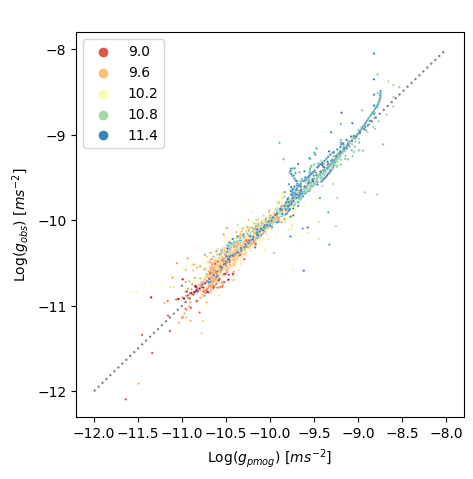

In [52]:
g = tuned.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_tuned_everything.eps')

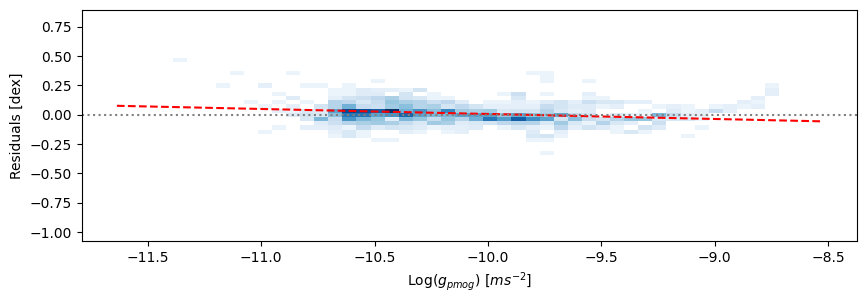

In [72]:
g = tuned.residual(xlabel=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_residual_g.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


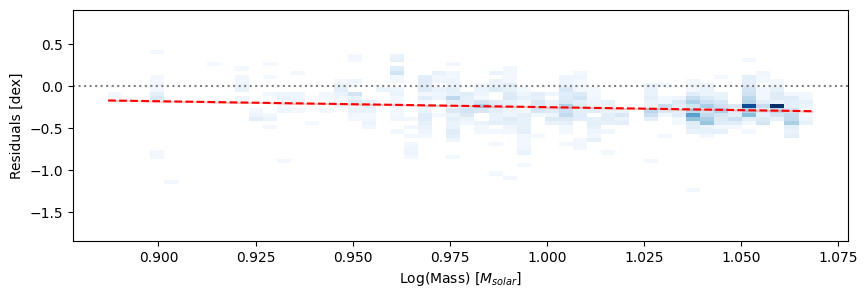

In [43]:
g = raw.residual(resid='log_M', xlabel='Log(Mass) [$M_{solar}$]')
if SAVE_FIGURES: g.savefig('../figures/pmog_residual_m.eps')

In [50]:
tuned.dataframe['Sbar'] *= analysis.uni['gamma']**0.5

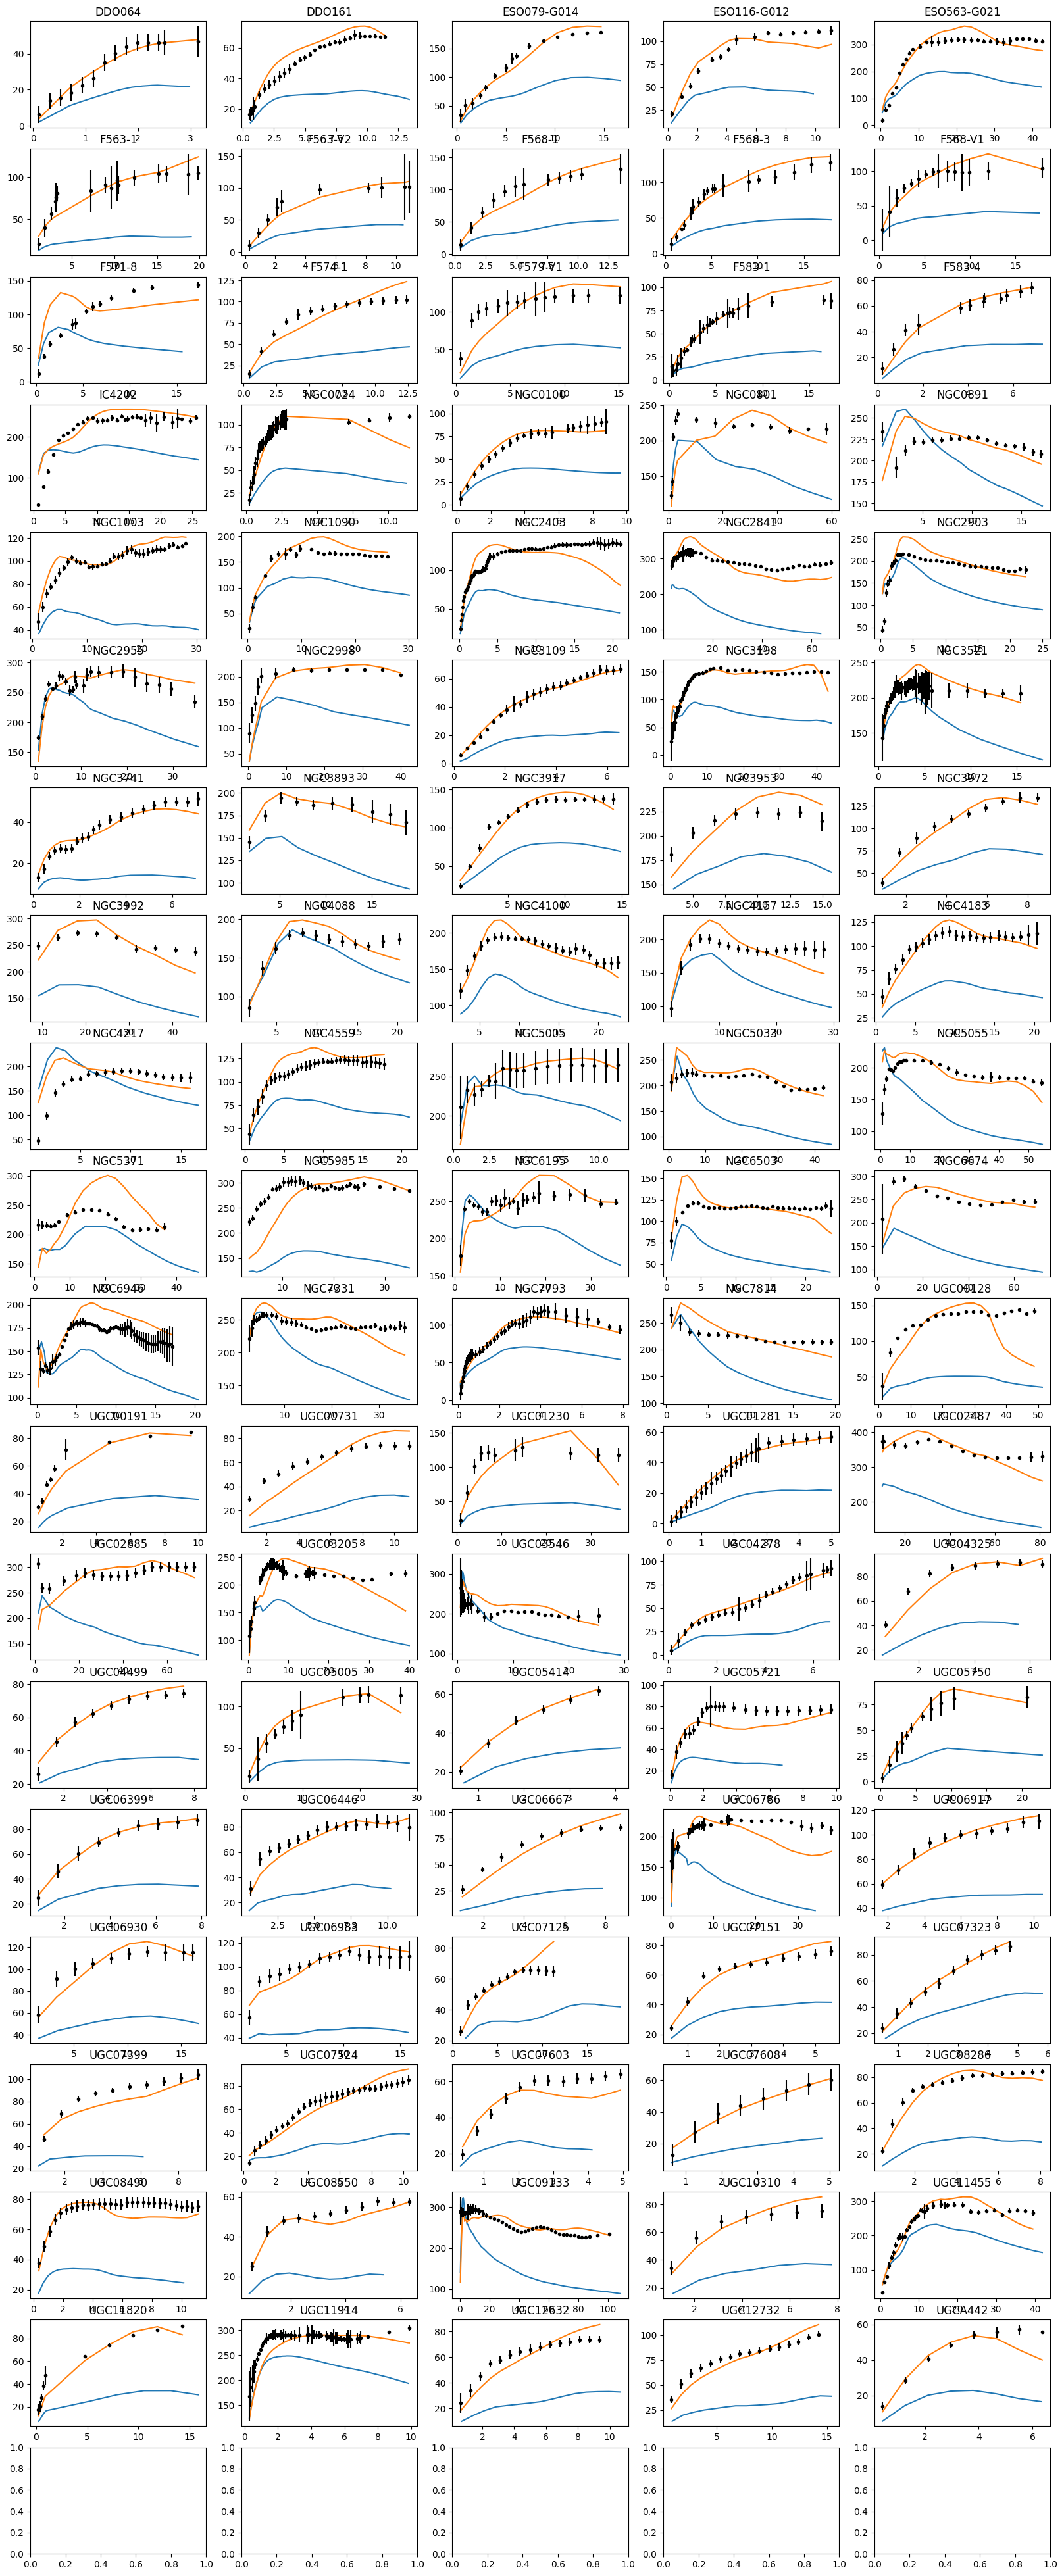

In [52]:
baseline = Result(load_sparc(namespace='baseline/201_21'))
g = tuned.plot_curves(baseline)

# Unconstrained tuning

In [69]:
unconstrained = Tune(mcmc(raw.datasets()[FILTER], train_g=True, tight={'Inc': 0.1, 'D': 5, 'Ymass': 0.1}))
superb = unconstrained.Result(fast=True, simulations=raw.simulations)
superb.dataframe['Sgbar'] *= unconstrained.uni['gamma']

Everything 0.011372418687461734 0.1349396440629304 2059
Quality data 0.011372418687461734 0.1349396440629304 2059
Quality simulation 0.008486080976639302 0.08276977070751868 1459
Quality simulation 2 0.009219925943844538 0.07644313460297887 1304


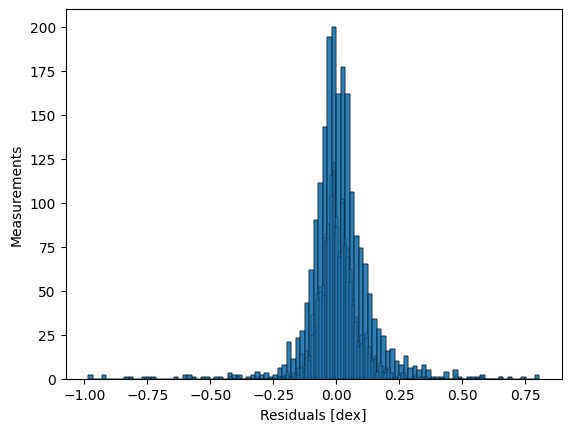

In [70]:
for k in superb.queries_strs.keys():
    g, data = superb.residual_hist(query_key=k)
    print(k, data.mean(), data.std(), data.count())